In [202]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
log_dir = 'C:/Users/user/rally_project/data/Rally_style/log/'
pcsv_dir = 'C:/Users/user/rally_project/data/Rally_style/CSV_preprocessed/'
filename = 'project2_data.csv'
df = pd.read_csv(pcsv_dir + filename)
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_11880\2731617261.py:8: DtypeWarning: Columns (58,61,67,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pcsv_dir + filename)


,Time(s),Lap(s),Distance(m),Complete%,X,Y,Z,speed(km/h),X vel,Y vel,...,current_pacenote_next_direction,current_pacenote_length,current_pacenote_width,current_pacenote_caution,current_pacenote_continue,pace_time(s),Delta steering,Delta throttle,Delta brake,Delta clutch
0,28.567856,2.416570,15.800781,0.003607,-1600.159546,483.638428,2995.896484,52.661560,13.158561,0.122939,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,-35.999640,0.0,60.002400
1,28.584576,2.433236,16.045563,0.003663,-1599.939941,483.640472,2995.789795,52.728127,13.173642,0.123346,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,-35.999640,0.0,60.002400
2,28.601223,2.449902,16.289108,0.003718,-1599.720459,483.642334,2995.683105,52.714771,13.168942,0.112298,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,0.000000
3,28.617910,2.466568,16.533379,0.003774,-1599.501099,483.644043,2995.576416,52.701351,13.164785,0.101706,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,0.000000
4,28.634604,2.483234,16.777603,0.003830,-1599.281738,483.645752,2995.469727,52.686554,13.159909,0.103074,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,0.000000
5,28.651329,2.499900,17.022602,0.003886,-1599.062134,483.647705,2995.362793,52.747002,13.172989,0.117199,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,-5.986199
6,28.667988,2.516566,17.267204,0.003942,-1598.841919,483.649689,2995.255371,52.916794,13.213669,0.118117,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,-5.986199
7,28.684637,2.533232,17.512821,0.003998,-1598.620483,483.651611,2995.147461,53.204967,13.284941,0.114663,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,0.000000,0.0,-5.986199
8,28.701307,2.549898,17.760635,0.004054,-1598.397461,483.653503,2995.038818,53.603909,13.384657,0.113394,...,right,NaN,NaN,NaN,NaN,2.57,0.00864,13.255670,0.0,-5.986199
9,28.717999,2.566564,18.010727,0.004111,-1598.172485,483.655457,2994.929199,54.064785,13.499905,0.117102,...,right,NaN,NaN,NaN,NaN,2.57,0.00000,13.333913,0.0,-5.986199


Total 52 columns in log data.

Columns description
'Time(s)' : The time at which the observation was recorded.
'Lap(s)': The time that has elapsed since the vehicle has left the starting line.
'Distance(m)': Distance the vehicle traveled. (It does not start with 0 at the start of the observation and has an error.)
'Complete%': Stage progress. (When completed, it has a value of 2.)
'X': The x-coordinate of the vehicle on the map. ## not sure
'Y': The y-coordinate of the vehicle on the map. ## not sure
'Z': The z-coordinate of the vehicle on the map. ## not sure
'speed(km/h)': Speed of the vehicle
'X vel' : ## Expected x-axis component of vehicle speed, but computationally does not match vehicle speed. I think the coordinate system is not vehicle. centered.
'Y vel' : ## Expected y-axis component of vehicle speed..
'Z vel' : ## Expected z-axis component of vehicle speed..
'X Rdir':
'Y Rdir':
'Z Rdir':
'X Fdir':
'Y Fdir':
'Z Fdir':
'SP-FL':
'SP-FR':
'SP-RL':
'SP-RR':
'DampV-FL': Front left Damper value
'DampV-FR': Front right Damper value
'DampV-RL': Rear left Damper value
'DampV-RR': Rear right Damper value
'WheelSpd-FL': Front left WheelSpd. ## In my calculation the unit of wheelSpd is rev/s (1 rev/s = 2pi rad/s)
'WheelSpd-FR': Front right WheelSpd. 
'WheelSpd-RL': Rear left WheelSpd.
'WheelSpd-RR': Rear right WheelSpd.
'Throttle' : 
'Steering':
'Brake':
'Clutch':
'Gear':
'fX(G)':
'fZ(G)':
'LapNum':
'RPM':
'Race Pos':
'SectorNum':
'Sector1Time':
'Sector2Time':
'BrakeT-FL':
'BrakeT-FR':
'BrakeT-RL':
'BrakeT-RR':
'LastLap(s)':
'Trajectory(deg)':
'slipFL': Front left slip. This appears to be the slip ratio value. However, since there is a negative value, it seems to be calculated by adding some constant term to the slip ratio value. (https://en.wikipedia.org/wiki/Slip_ratio)
'slipFR': Front right slip.
'slipRL': Rear left slip.
'slipRR': Rear right slip.

(array([13085.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4689.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

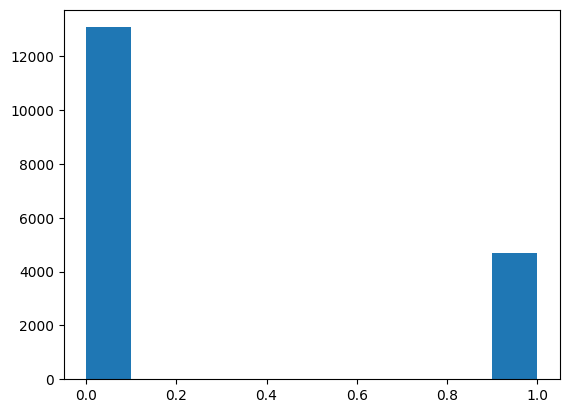

In [203]:
## 바퀴 양쪽이 앞 뒤 각각 크게 임발란스 할 경우 슬립으로 판정.
F_imb = (df['slipFR']-df['slipFL']).abs()>2.5
R_imb = (df['slipRR']-df['slipRL']).abs()>2.5
ndf = df.copy()
ndf['Slip issue'] = F_imb | R_imb
ndf.loc[ndf['Slip issue']==True,'Slip issue'] = 1
ndf.loc[ndf['Slip issue']==False,'Slip issue'] = 0
plt.hist((ndf['Slip issue']))

In [204]:
new_ndf1 = ndf.drop(['slipFR','slipFL','slipRR','slipRL',
                     'LastLap(s)','Vehicle_tyre','Vehicle_tyre_performance','Vehicle_tyre_durability',
                     'SP-FR','SP-FL','SP-RR','SP-RL','Lap(s)',
                     'X','Y','Z','X vel','Y vel','Z vel','Time(s)','Complete%','Trajectory(deg)','Race Pos','stage_result',
                     'X Rdir','Y Rdir','Z Rdir','X Fdir','Y Fdir','Z Fdir','SectorNum','Sector1Time','Sector2Time',
                     'DampV-FL','DampV-FR','DampV-RL','DampV-RR','BrakeT-FL','BrakeT-FR','BrakeT-RL','BrakeT-RR',
                     'WheelSpd-FR','WheelSpd-FL','WheelSpd-RR','WheelSpd-RL'
                     ]
                     ,axis=1)

## 결측치 처리
new_ndf1 = new_ndf1.fillna('null')
idx = (new_ndf1.dtypes!=float)



In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve, f1_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV
X = new_ndf1.drop('Slip issue', axis = 1)
y = new_ndf1['Slip issue']
std_col = X.columns[X.dtypes == float]
ord_col = X.columns[X.dtypes != float]

label = np.concatenate((std_col.values,ord_col.values))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

encoder1 = OrdinalEncoder()
encoder2 = StandardScaler()

X_train_encoded_o = encoder1.fit_transform(X_train[ord_col])
X_val_encoded_o = encoder1.transform(X_val[ord_col])    
X_test_encoded_o = encoder1.transform(X_test[ord_col]) 
X_train_encoded_s = encoder2.fit_transform(X_train[std_col])
X_val_encoded_s = encoder2.transform(X_val[std_col])    
X_test_encoded_s = encoder2.transform(X_test[std_col])

X_train_encoded_o = pd.DataFrame(X_train_encoded_o,columns=ord_col.values).reset_index(drop=True)
X_val_encoded_o = pd.DataFrame(X_val_encoded_o,columns=ord_col.values).reset_index(drop=True)    
X_test_encoded_o = pd.DataFrame(X_test_encoded_o,columns=ord_col.values).reset_index(drop=True)
X_train_encoded_s = pd.DataFrame(X_train_encoded_s,columns=std_col.values).reset_index(drop=True)
X_val_encoded_s =  pd.DataFrame(X_val_encoded_s,columns=std_col.values).reset_index(drop=True)    
X_test_encoded_s =  pd.DataFrame(X_test_encoded_s,columns=std_col.values).reset_index(drop=True)

X_train_encoded = pd.concat((X_train_encoded_o,X_train_encoded_s),axis = 1)
X_val_encoded = pd.concat((X_val_encoded_o,X_val_encoded_s),axis = 1)
X_test_encoded = pd.concat((X_test_encoded_o,X_test_encoded_s),axis = 1)

model = RandomForestClassifier(
    n_estimators=500,  # 매우 큰 값으로 설정했지만, 성능 향상이 없으면 자동으로 종료합니다.
    random_state=42,
    n_jobs=-1,
    max_depth=6
)

params = {
    "max_depth": [4,5,6],
    'oob_score':[True,False],
    "class_weight":['balanced',None]
}

grid_search = GridSearchCV(model, param_grid=params, scoring="roc_auc", cv=5, verbose=3)
grid_search.fit(X_train_encoded, y_train)

RF_result = grid_search.best_estimator_
print(f1_score(y_val,RF_result.predict(X_val_encoded)))
print(roc_auc_score(y_val,RF_result.predict(X_val_encoded)))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.933 total time=   1.5s
[CV 2/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.939 total time=   1.4s
[CV 3/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.940 total time=   1.5s
[CV 4/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.931 total time=   1.7s
[CV 5/5] END class_weight=balanced, max_depth=4, oob_score=True;, score=0.933 total time=   1.6s
[CV 1/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.933 total time=   1.0s
[CV 2/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.939 total time=   0.9s
[CV 3/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.940 total time=   0.9s
[CV 4/5] END class_weight=balanced, max_depth=4, oob_score=False;, score=0.931 total time=   1.0s
[CV 5/5] END class_weight=balanced, max_depth=4, oob_score=Fal

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_val, RF_result.predict(X_val_encoded)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2094
           1       0.91      0.71      0.80       750

    accuracy                           0.91      2844
   macro avg       0.91      0.84      0.87      2844
weighted avg       0.91      0.91      0.90      2844



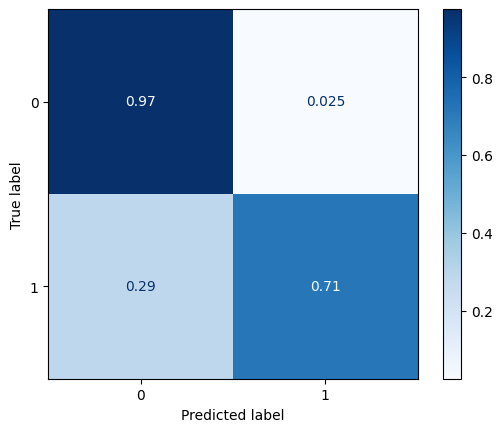

In [207]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import seaborn as sns
def plot_confusion_matrix(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)
    cm = confusion_matrix(y_val, y_pred, normalize = 'true')
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.show()

plot_confusion_matrix(RF_result, X_val_encoded, y_val)

Text(0, 0.5, 'TPR')

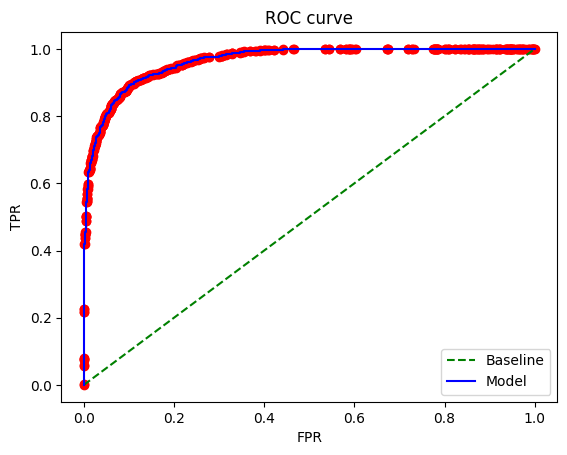

In [208]:
from sklearn.metrics import roc_auc_score,roc_curve, f1_score

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, RF_result.predict_proba(X_val_encoded)[:,1])
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.legend()
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0.5, 1.0, 'Permutation Importance')

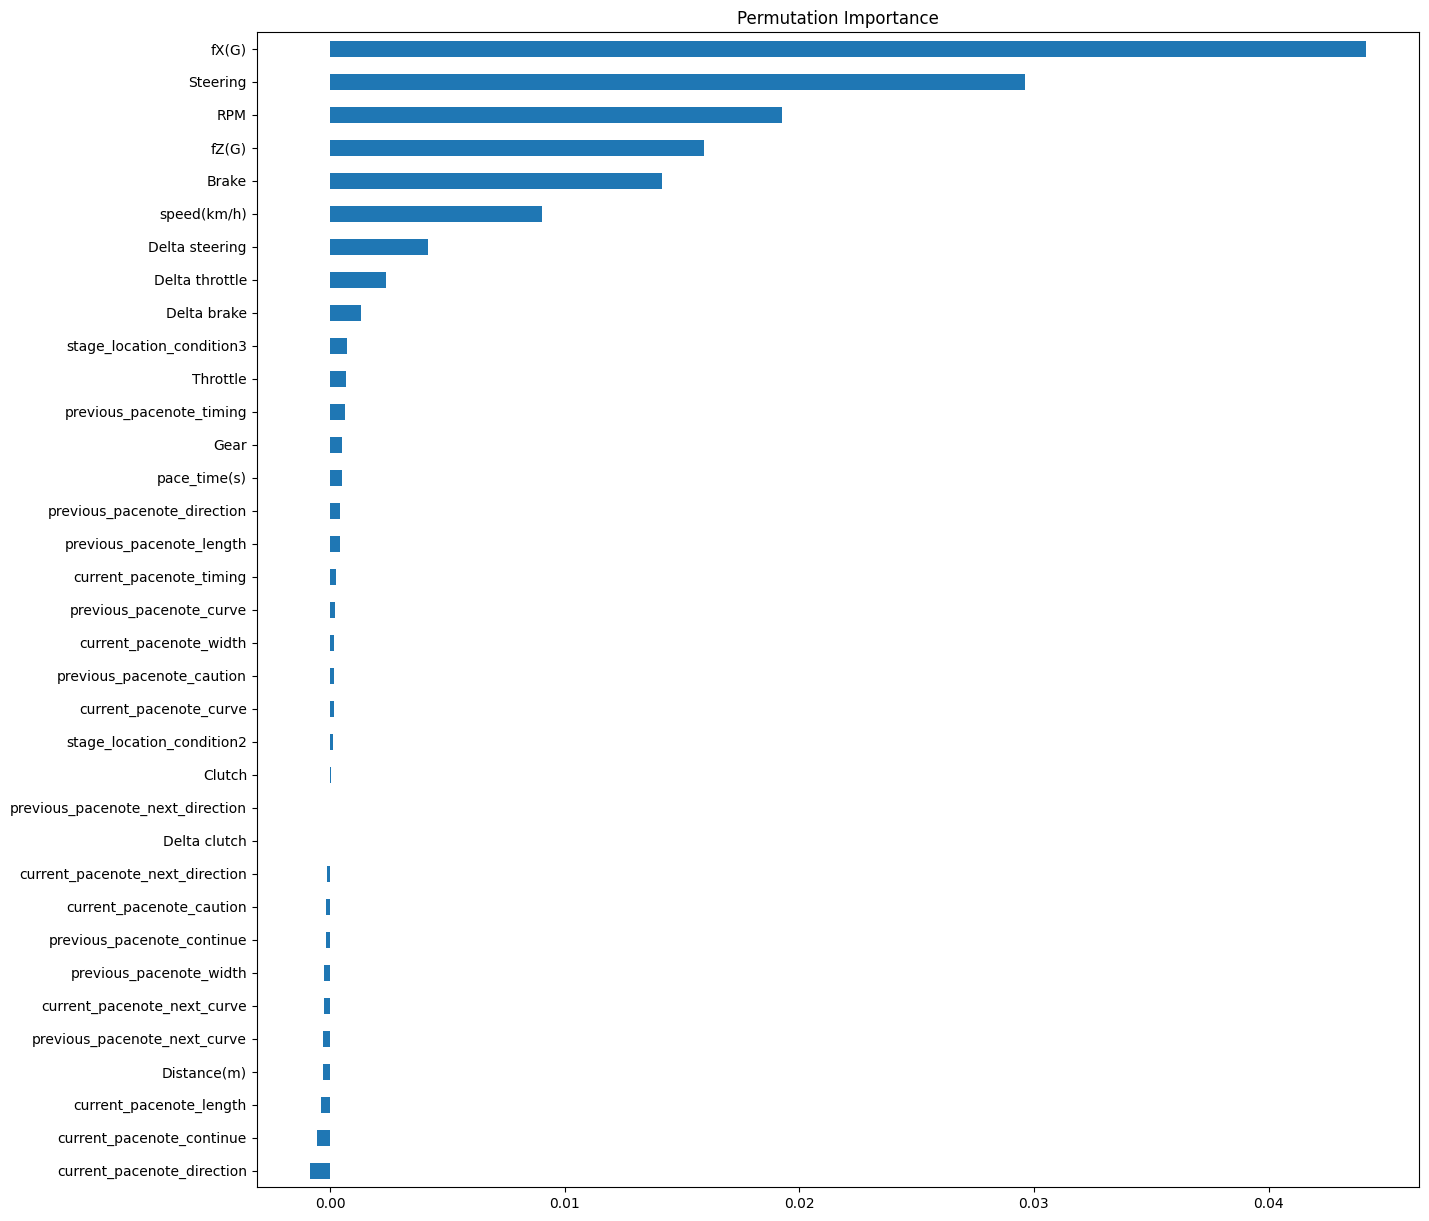

In [209]:
# !pip3 install eli5
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    RF_result,  # model
    scoring="accuracy",  # metric
    n_iter=8,  # 다른 random seed를 사용하여 8번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter.fit(X_val_encoded, y_val)
feature_names = X_val_encoded.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh(figsize = (15,15))
plt.title("Permutation Importance")

In [210]:
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0442 ± 0.0042,fX(G)
0.0296 ± 0.0042,Steering
0.0193 ± 0.0048,RPM
0.0160 ± 0.0026,fZ(G)
0.0142 ± 0.0026,Brake
0.0090 ± 0.0032,speed(km/h)
0.0042 ± 0.0024,Delta steering
0.0024 ± 0.0018,Delta throttle
0.0013 ± 0.0017,Delta brake
0.0007 ± 0.0015,stage_location_condition3


In [211]:
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from xgboost.sklearn import XGBRFClassifier
from xgboost import DMatrix
from xgboost import train,Booster

# D_train = DMatrix(X_train_encoded, y_train)
# D_valid = DMatrix(X_val_encoded, y_val)

# # Define a custom evaluation metric used for early stopping.
# def eval_error_metric(predt, dtrain: DMatrix):
#     label = dtrain.get_label()
#     r = np.zeros(predt.shape)
#     gt = predt > 0.5
#     r[gt] = 1 - label[gt]
#     le = predt <= 0.5
#     r[le] = label[le]
#     return 'CustomErr', np.sum(r)

# # Specify which dataset and which metric should be used for early stopping.
# early_stop = EarlyStopping(rounds=100,
#                                         metric_name='CustomErr',
#                                         data_name='Train')

# bt = train(
#     {'objective': 'binary:logistic',
#      'eval_metric': ['error', 'auc'],
#       'random_state' : 2,
#     'n_estimators':  9999999,
#     'max_depth': 5,
#     'learning_rate': 0.1,}
#      D_train,
#     evals=[(D_train, 'Train'), (D_valid, 'Valid')],
#     feval=eval_error_metric,
#     num_boost_round=1000,
#     callbacks=[early_stop],
#     verbose_eval=False)

model =  XGBClassifier(
    objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators= 500,
        # random_state=42,
        n_jobs=-1,
        max_depth=5,
        learning_rate=0.01,        
)

params = {
    "max_depth": [6],
    "learning_rate":[0.01,0.1,0.5],
    "scale_pos_weight":[1], #,sum(y_train==0)/sum(y_train==1)],
    "subsample": [0.1,0.5,0.8],
    "colsample_bytree": [0.3, 0.5, 0.8]
}

eset = [(X_train_encoded,y_train),(X_val_encoded,y_val)]


grid_search = GridSearchCV(model, param_grid=params, scoring="roc_auc", cv=5, verbose=3)
grid_search.fit(X_train_encoded, y_train)

xgbc_result = grid_search.best_estimator_
print(f1_score(y_val,xgbc_result.predict(X_val_encoded)))
print(roc_auc_score(y_val,xgbc_result.predict(X_val_encoded)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.975 total time=   1.2s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.978 total time=   1.4s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.977 total time=   1.6s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.975 total time=   1.3s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.1;, score=0.978 total time=   1.4s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.5;, score=0.982 total time=   2.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=6, scale_pos_weight=1, subsample=0.5;, score=0.985 total time= 

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_val, xgbc_result.predict(X_val_encoded)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2094
           1       0.95      0.95      0.95       750

    accuracy                           0.97      2844
   macro avg       0.97      0.97      0.97      2844
weighted avg       0.97      0.97      0.97      2844



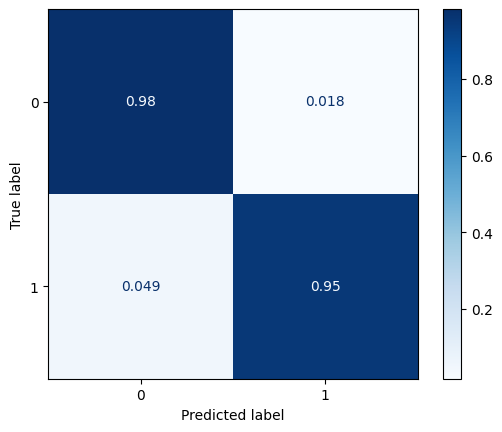

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)>

In [213]:
plot_confusion_matrix(xgbc_result, X_val_encoded, y_val)
xgbc_result.get_params

Text(0, 0.5, 'TPR')

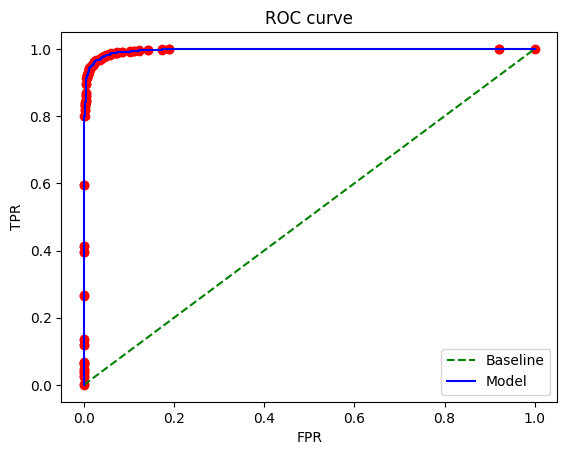

In [214]:
baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, xgbc_result.predict_proba(X_val_encoded)[:,1])
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.legend()
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgbc_result.predict(X_test_encoded)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2617
           1       0.95      0.95      0.95       938

    accuracy                           0.97      3555
   macro avg       0.97      0.97      0.97      3555
weighted avg       0.97      0.97      0.97      3555



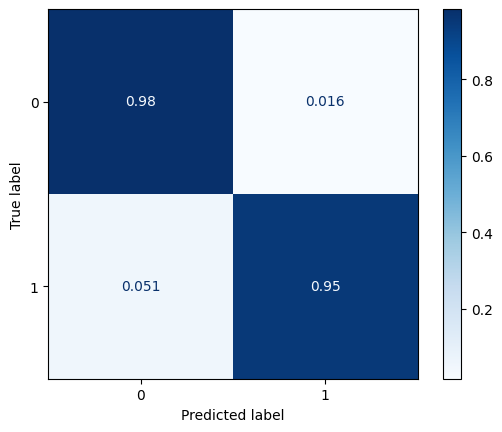

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)>

In [216]:
plot_confusion_matrix(xgbc_result, X_test_encoded, y_test)
xgbc_result.get_params

Text(0.5, 1.0, 'Permutation Importance')

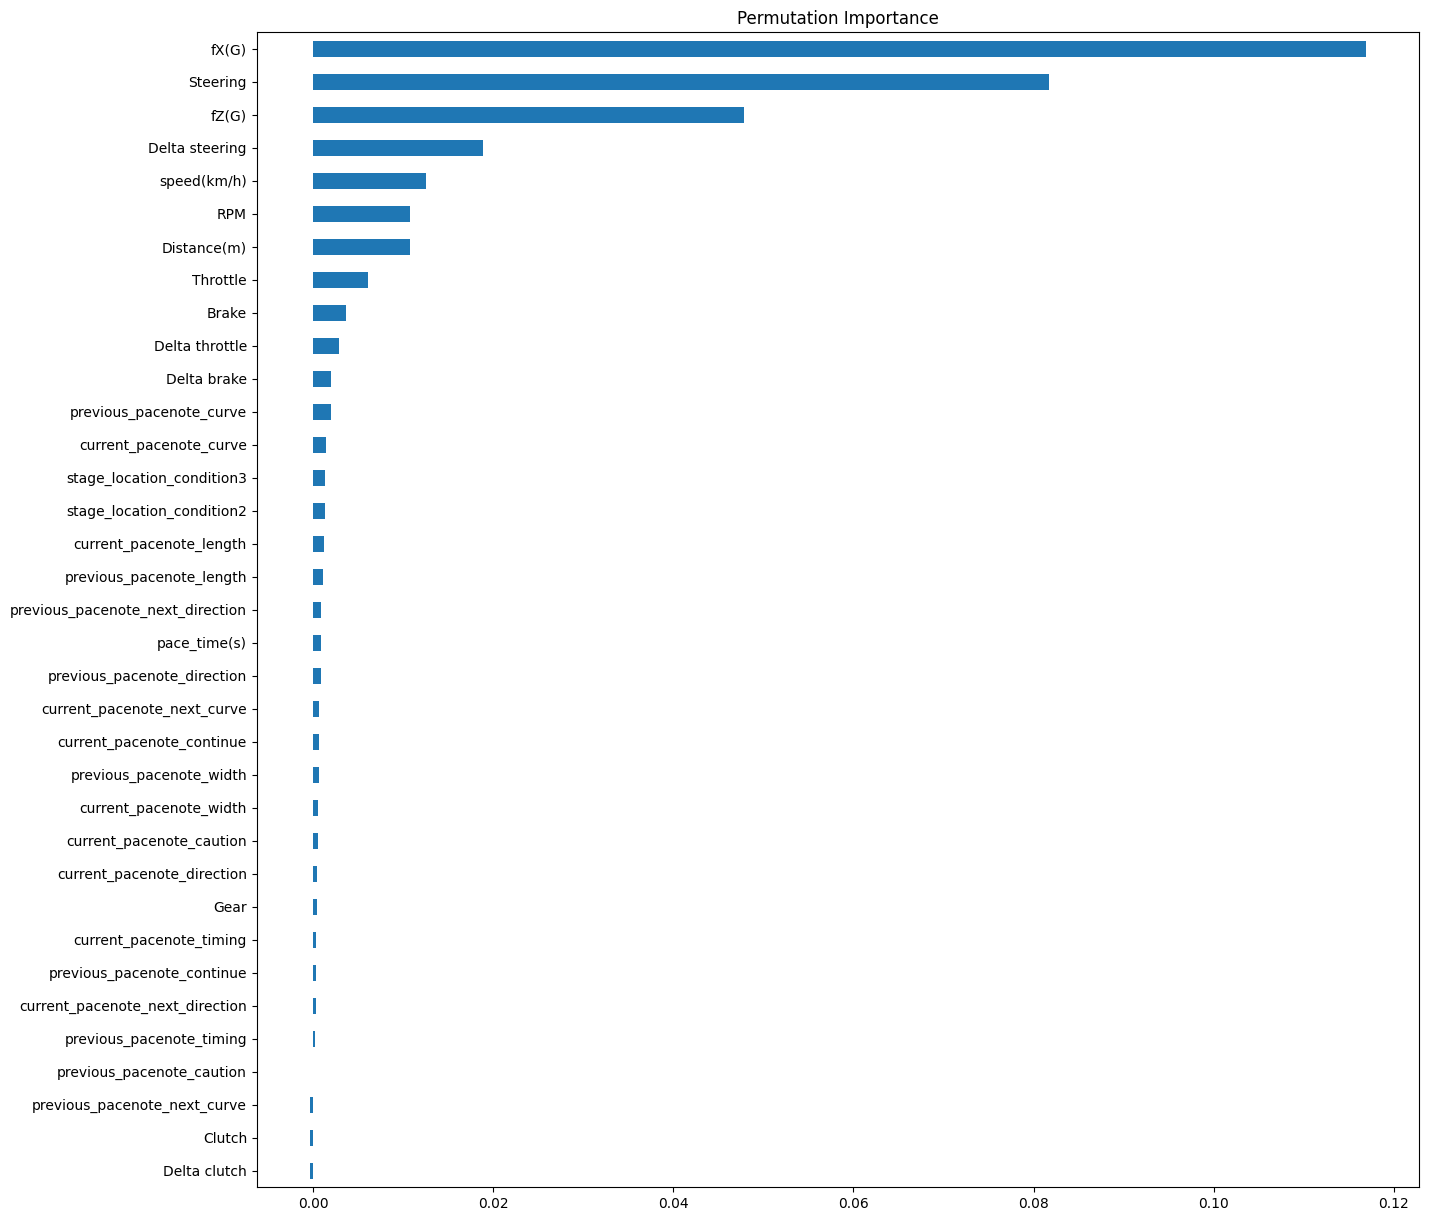

In [218]:
# permuter 정의
permuter = PermutationImportance(
    xgbc_result,  # model
    scoring="accuracy",  # metric
    n_iter=8,  # 다른 random seed를 사용하여 8번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
permuter.fit(X_val_encoded, y_val)
feature_names = X_val_encoded.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh(figsize = (15,15))
plt.title("Permutation Importance")

In [236]:
import eli5.formatters.as_dataframe as ed
eli5.show_weights(
    permuter,
    top=10,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)


Weight,Feature
0.1170 ± 0.0088,fX(G)
0.0817 ± 0.0047,Steering
0.0478 ± 0.0053,fZ(G)
0.0189 ± 0.0035,Delta steering
0.0126 ± 0.0046,speed(km/h)
0.0108 ± 0.0025,RPM
0.0108 ± 0.0024,Distance(m)
0.0061 ± 0.0020,Throttle
0.0036 ± 0.0020,Brake
0.0029 ± 0.0018,Delta throttle


In [220]:
print(f1_score(y_val,xgbc_result.predict(X_val_encoded)))
print(roc_auc_score(y_val,xgbc_result.predict(X_val_encoded)))
print(f1_score(y_val,[0] * len(y_val)))
print(roc_auc_score(y_val,[0] * len(y_val)))


0.9506666666666667
0.9664985673352435
0.0
0.5


In [221]:
print(f1_score(y_test,xgbc_result.predict(X_test_encoded)))
print(roc_auc_score(y_test,xgbc_result.predict(X_test_encoded)))

0.9518716577540108
0.9663891905720592


In [237]:
RF_result.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=6, n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)>